# Jupyter notebook sample

In [1]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
from scipy.stats import linregress
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression

In [ ]:
# Import Dataset and create Dataframe
filepath = "Resource/user_behavior_dataset.csv"
df = pd.read_csv(filepath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
#drop "points" column
df_new = df.drop('User Behavior Class', axis=1)
df_new.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [4]:
# pull apart to only show Age / Data Usage

age_data_usage  = df_new[['Age', 'Data Usage (MB/day)']]



age_data_usage

,Age,Data Usage (MB/day)
0,40,1122
1,47,944
2,42,322
3,20,871
4,31,988
...,...,...
695,22,381
696,59,1201
697,50,457
698,44,224


In [5]:
screen_time= df_new[['Age', 'Screen On Time (hours/day)']]
screen_time

,Age,Screen On Time (hours/day)
0,40,6.4
1,47,4.7
2,42,4.0
3,20,4.8
4,31,4.3
...,...,...
695,22,3.9
696,59,6.8
697,50,3.1
698,44,1.7


In [6]:
#Adjust the color pallet

#Generate the CMRmap
palette = sns.color_palette('CMRmap', n_colors=256)
# Adjust the brightness of the palette
def adjust_brightness(palette, factor): return [(min(1, max(0, c * factor)) for c in color) for color in palette]
# Apply a factor to darken the palette
darker_palette = adjust_brightness(palette, 0.8)
# Create a new color palette from the adjusted colors sns.palplot(darker_palette)

C:\Users\Brian\AppData\Local\Temp\ipykernel_15048\1482387143.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Data Usage (MB/day)', data=mean_data_usage, palette=palette)
C:\Users\Brian\AppData\Local\Temp\ipykernel_15048\1482387143.py:11: UserWarning: 
The palette list has fewer values (5) than needed (42) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Age', y='Data Usage (MB/day)', data=mean_data_usage, palette=palette)


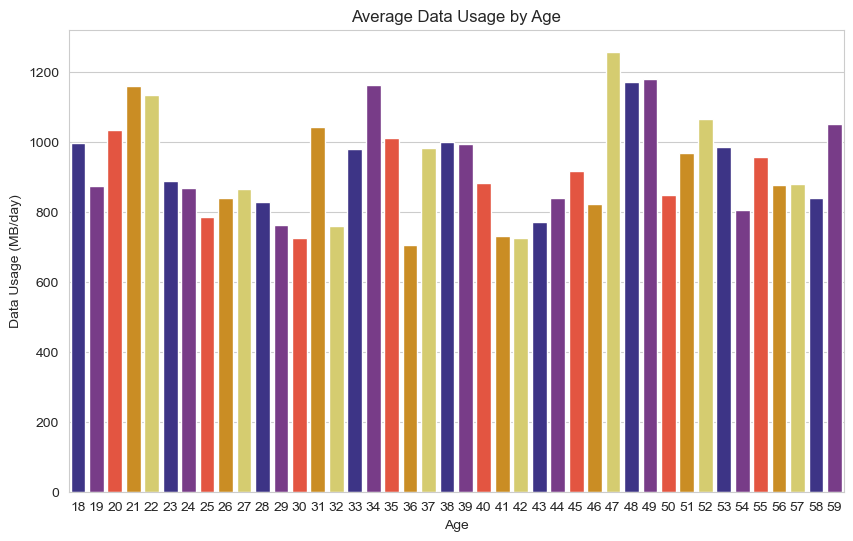

In [7]:
# Generate the CMRmap color palette with n colors
n_colors = 5
palette = sns.color_palette(palette='CMRmap', n_colors=n_colors)


# Group by Age and calculate the mean data usage per age
mean_data_usage = age_data_usage.groupby('Age')['Data Usage (MB/day)'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Data Usage (MB/day)', data=mean_data_usage, palette=palette)

# Add titles and labels
plt.title('Average Data Usage by Age')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.grid(True, axis='y')



# Show the plot
plt.show()


0.003998949266862071
y = 0.21x + 921.54


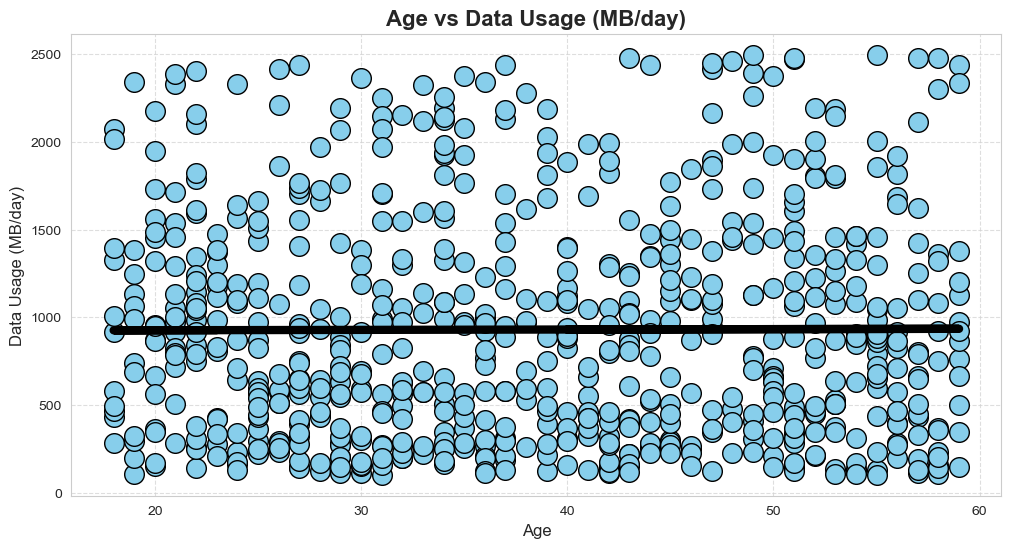

In [8]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, annotation):
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))

    # Create a basic plot
    plt.scatter(x_values, y_values, color="skyblue", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    # Customizations

    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")

    # Show/Save the Graph
    plt.show()


# Southern Hemisphere
x_value = df_new['Age']
y_value = df_new['Data Usage (MB/day)']
x_label = "Age"
y_label = "Data Usage (MB/day)"
annotation = (5, 0)
plot_linear_regression(x_value, y_value, x_label, y_label, annotation)

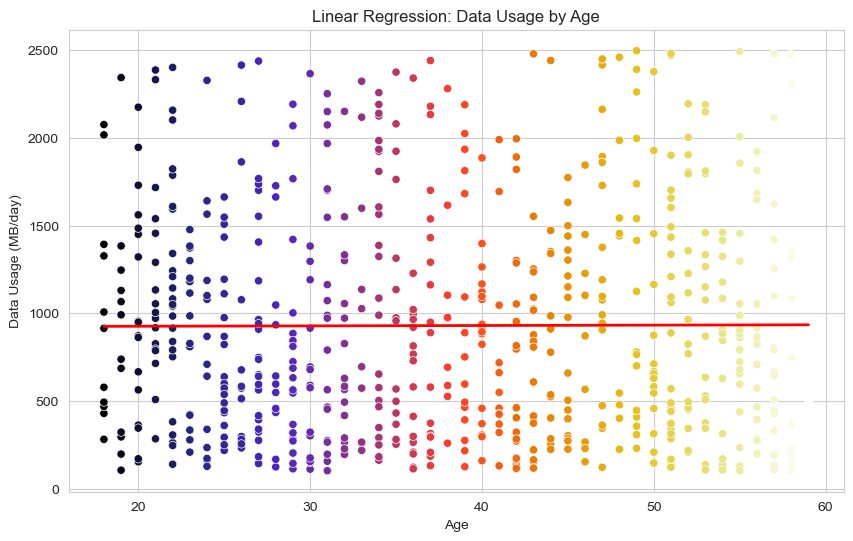

In [9]:


# Prepare the data
X = age_data_usage[['Age']]  # Predictor
y = age_data_usage['Data Usage (MB/day)']  # Target

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values for plotting the regression line
X_plot = pd.DataFrame({'Age': np.linspace(X['Age'].min(), X['Age'].max(), 100)})
y_plot = model.predict(X_plot)

# Plot the original data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Data Usage (MB/day)', data=age_data_usage, hue='Age', palette='CMRmap', legend=False)

# Plot the regression line
plt.plot(X_plot, y_plot, color='red', linewidth=2)

# Add titles and labels
plt.title('Linear Regression: Data Usage by Age')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.grid(True, axis='y')




# Show the plot
plt.show()



<Axes: xlabel='Age', ylabel='Data Usage (MB/day)'>

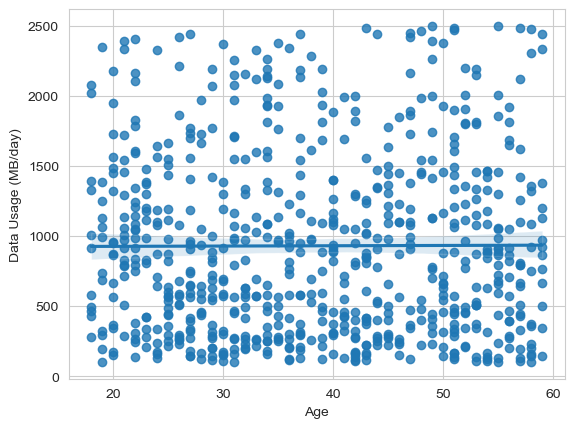

In [10]:
# Assuming you have a DataFrame 'df' with columns 'x' and 'y'

sns.regplot(data=age_data_usage, x="Age", y="Data Usage (MB/day)")


C:\Users\Brian\AppData\Local\Temp\ipykernel_15048\1337405429.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_grouped =age_device_model_usage ['Age Group'] = pd.cut(age_device_model_usage['Age'], bins=num_bins, labels=[f'Group {i}' for i in range(1, num_bins + 1)])


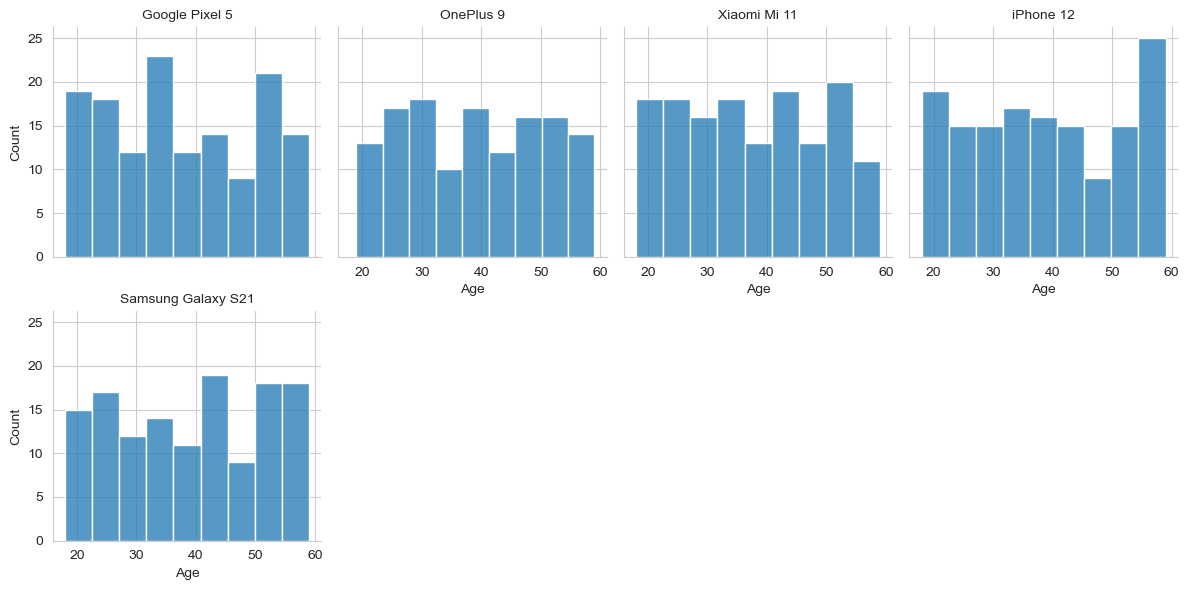

<Figure size 5000x5000 with 0 Axes>

In [11]:

# pull apart to only show Age / Data Usage

age_device_model_usage = df[['Age', 'Device Model']]



# Define the number of bins for ages
num_bins = 5

# Create bins of equal width and label them

age_grouped =age_device_model_usage ['Age Group'] = pd.cut(age_device_model_usage['Age'], bins=num_bins, labels=[f'Group {i}' for i in range(1, num_bins + 1)])

# Create a FacetGrid
g = sns.FacetGrid(age_device_model_usage, col='Device Model', col_wrap=4)  # Adjust col_wrap for layout
g.map(sns.histplot, 'Age')  # Change 'sns.histplot' to your preferred plot type

# Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Age", "Count")
# plot size
plt.figure(figsize=(50, 50))  # Adjust the size as needed
# Show the plot
plt.show()

In [12]:
age_device_model_usage

,Age,Device Model,Age Group
0,40,Google Pixel 5,Group 3
1,47,OnePlus 9,Group 4
2,42,Xiaomi Mi 11,Group 3
3,20,Google Pixel 5,Group 1
4,31,iPhone 12,Group 2
...,...,...,...
695,22,iPhone 12,Group 1
696,59,Xiaomi Mi 11,Group 5
697,50,Google Pixel 5,Group 4
698,44,Samsung Galaxy S21,Group 4


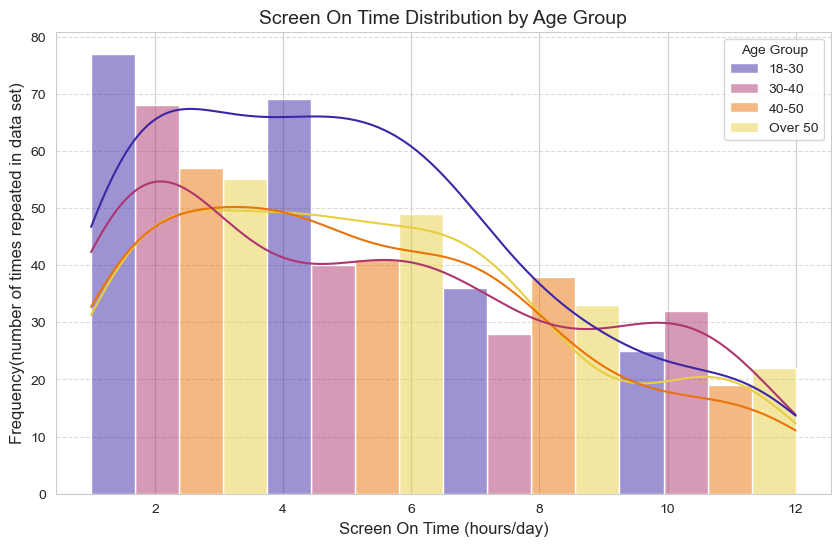

In [13]:
# Plot histogram
# Assuming df_new is your DataFrame containing 'Age' and 'Data Usage (MB/day)'
screen_time= screen_time[['Age', 'Screen On Time (hours/day)']]

# Define the number of bins for ages
num_bins = 4

# Create bins of equal width and label them with descriptive names
age_bins = [screen_time['Age'].min(), 30, 40, 50, screen_time['Age'].max()]  # Example age ranges
age_labels = [ '18-30', '30-40', '40-50', 'Over 50']  # Descriptive labels
screen_time['Age Group'] = pd.cut(screen_time['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=screen_time,
    x='Screen On Time (hours/day)',
    hue='Age Group',
    bins=num_bins,
    kde=True,
    palette='CMRmap',
    multiple="dodge"  # Adjust to "layer", "fill", or "dodge" depending on preferred style
)

# Add titles and labels
plt.title('Screen On Time Distribution by Age Group', fontsize=14)
plt.xlabel('Screen On Time (hours/day)', fontsize=12)
plt.ylabel('Frequency(number of times repeated in data set)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

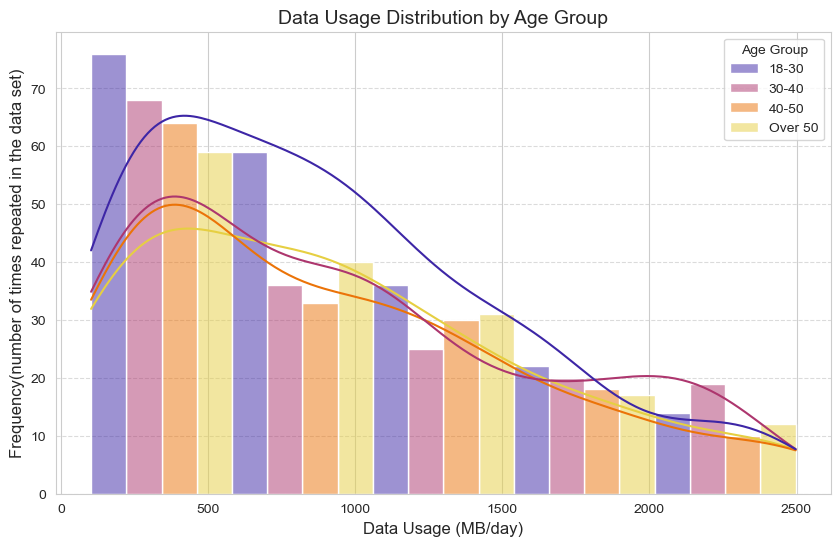

In [14]:
# Plot histogram
# Assuming df_new is your DataFrame containing 'Age' and 'Data Usage (MB/day)'
age_data_usage= age_data_usage[['Age', 'Data Usage (MB/day)']]

# Define the number of bins for ages
num_bins = 5

# Create bins of equal width and label them with descriptive names
age_bins = [age_data_usage['Age'].min(), 30, 40, 50, df_new['Age'].max()]  # Example age ranges
age_labels = ['18-30', '30-40', '40-50', 'Over 50']  # Descriptive labels
age_data_usage['Age Group'] = pd.cut(age_data_usage['Age'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=age_data_usage,
    x='Data Usage (MB/day)',
    hue='Age Group',
    bins=num_bins,
    kde=True,
    palette='CMRmap',
    multiple="dodge"  # Adjust to "layer", "fill", or "dodge" depending on preferred style
)

# Add titles and labels
plt.title('Data Usage Distribution by Age Group', fontsize=14)
plt.xlabel('Data Usage (MB/day)', fontsize=12)
plt.ylabel('Frequency(number of times repeated in the data set)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [15]:
age_grouped


0      Group 3
1      Group 4
2      Group 3
3      Group 1
4      Group 2
        ...   
695    Group 1
696    Group 5
697    Group 4
698    Group 4
699    Group 1
Name: Age, Length: 700, dtype: category
Categories (5, object): ['Group 1' < 'Group 2' < 'Group 3' < 'Group 4' < 'Group 5']

In [16]:

# pull apart to only show Age / Data Usage

age_device_model_usage = df[['Age', 'Device Model']]


age_device_model_usage





,Age,Device Model
0,40,Google Pixel 5
1,47,OnePlus 9
2,42,Xiaomi Mi 11
3,20,Google Pixel 5
4,31,iPhone 12
...,...,...
695,22,iPhone 12
696,59,Xiaomi Mi 11
697,50,Google Pixel 5
698,44,Samsung Galaxy S21


C:\Users\Brian\AppData\Local\Temp\ipykernel_15048\713147274.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_device_model_usage, x='Age', y='Device Model', palette='CMRmap', linewidth=2.5)


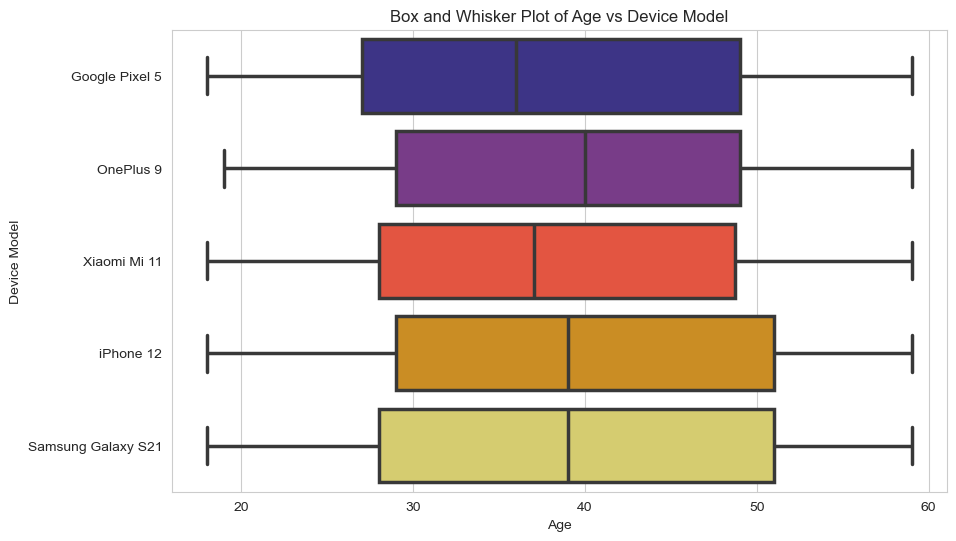

In [17]:
#Device model vs Age
#Standard Box Plot
# Define the number of bins for ages
num_bins = 5

# Create bins of equal width and label them

df_new['Age Group'] = pd.cut(df_new['Age'], bins=num_bins, labels=[f'Group {i}' for i in range(1, num_bins + 1)])

# Plot size
plt.figure(figsize=(10, 6))  # Adjust the size as needed

# Create the boxenplot
sns.boxplot(data=age_device_model_usage, x='Age', y='Device Model', palette='CMRmap', linewidth=2.5)

# Add titles and labels
plt.title('Box and Whisker Plot of Age vs Device Model')
plt.xlabel('Age')
plt.ylabel('Device Model')



# Show the plot
plt.show()



C:\Users\Brian\AppData\Local\Temp\ipykernel_15048\3587961321.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=age_device_model_usage, x='Age', y='Device Model', palette='CMRmap', linewidth=2.5)


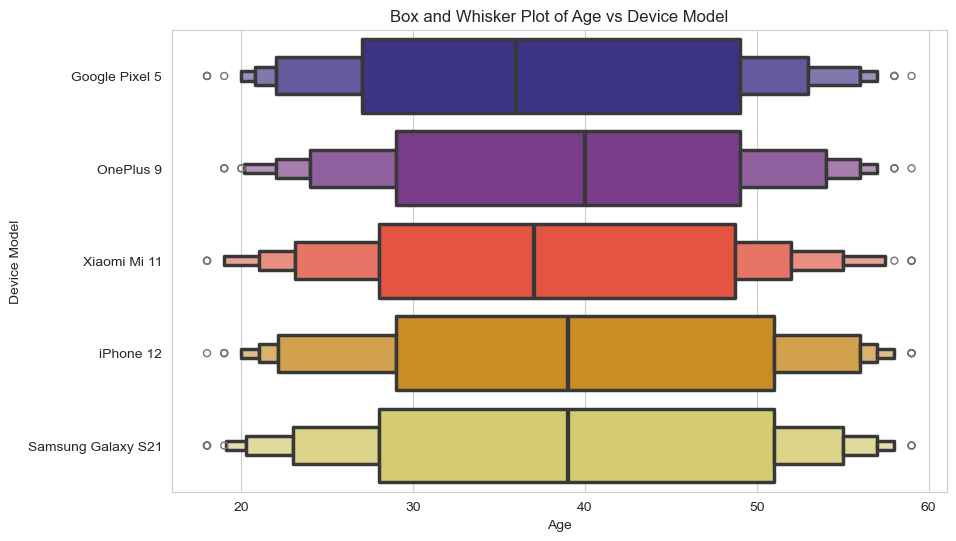

In [18]:

#Device model vs Age
#Box and Wisker plot
# Define the number of bins for ages
num_bins = 5

# Create bins of equal width and label them

df_new['Age Group'] = pd.cut(df_new['Age'], bins=num_bins, labels=[f'Group {i}' for i in range(1, num_bins + 1)])

# Plot size
plt.figure(figsize=(10, 6))  # Adjust the size as needed

# Create the boxenplot
sns.boxenplot(data=age_device_model_usage, x='Age', y='Device Model', palette='CMRmap', linewidth=2.5)

# Add titles and labels
plt.title('Box and Whisker Plot of Age vs Device Model')
plt.xlabel('Age')
plt.ylabel('Device Model')

# Show the plot
plt.show()


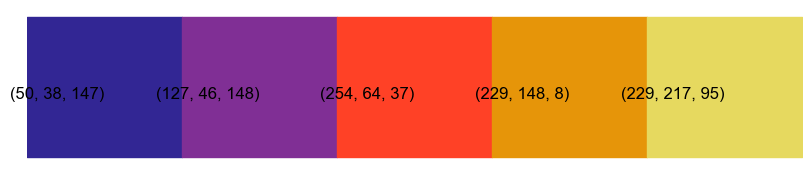

In [19]:

# Generate the CMRmap color palette with n colors
n_colors = 5
palette = sns.color_palette(palette='CMRmap', n_colors=n_colors)

# Create a figure
plt.figure(figsize=(10, 2))

# Plot each color as a rectangle and annotate with RGB values
for i, color in enumerate(palette):
    plt.fill_between([i, i+1], 0, 1, color=color)
    rgb = tuple([int(x*255) for x in color])
    plt.text(i + 0.5, 0.5, str(rgb), ha='right', va='top', color='black', fontsize=12)

# Remove axes for clarity
plt.gca().set_axis_off()
plt.gca().set_xlim(0, len(palette))

# Show the plot
plt.show()

